Notebook  to explore ICC ratings, which could explain the low ICC observed using the contrast maps

In [1]:
ratings_data = pd.read_csv("../data/pip_emoreg_ratings_raw.csv")
demo_data = pd.read_csv("../data/Thomas_Javi_ML_Share_PIP_Reappraisal_IMT_Longitudinal_02_NOV_2020.csv")
subject_fullsample =  demo_data.iloc[:,2].to_numpy()
print("Subjects used = %d" % len(subject_fullsample))

ratings_data_full = ratings_data[ratings_data.ID.isin(subject_fullsample)]
print(len(ratings_data_full.ID.unique()))

subjects_preds = pd.read_csv("../data/final_subjects_used.txt", header=None).iloc[:,0].to_list()
print("Subjects used for prediction = %d" % len(subjects_preds))

ratings_data_preds = ratings_data[ratings_data.ID.isin(subjects_preds)]
print(len(ratings_data_preds.ID.unique()))

plt.rcParams['font.family']="Arial"

Subjects used = 176
176
Subjects used for prediction = 145
145


In [2]:
ratings_data.head()

,ID,Trial,PicValence,Procedure,IAPS,Rating_RESP,Rating_RT
0,1,1,negative,WatchProc,3350.bmp,4.0,2464.0
1,1,2,negative,RegulateProc,9250.bmp,3.0,1654.0
2,1,3,negative,WatchProc,3120.bmp,4.0,946.0
3,1,4,neutral,WatchProc,7550.bmp,1.0,763.0
4,1,5,negative,RegulateProc,9420.bmp,3.0,1812.0


In [3]:
# Split-half: first half with the first 23 trial, second half with the remaining 22
ratings_data_full.loc[:, 'half'] = ratings_data_full.Trial.apply(lambda x: "First" if x <= 23 else "Second")
ratings_data_preds.loc[:, 'half'] = ratings_data_preds.Trial.apply(lambda x: "First" if x <= 23 else "Second")

/home/javi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [4]:
ratings_data_full = ratings_data_full[ratings_data_full.PicValence=="negative"]
ratings_data_full.Procedure = ratings_data_full.Procedure.replace(to_replace=["WatchProc", "RegulateProc"], 
                                                                  value=["Look Negative", "Regulate Negative"])

ratings_data_preds = ratings_data_preds[ratings_data_preds.PicValence=="negative"]
ratings_data_preds.Procedure = ratings_data_preds.Procedure.replace(to_replace=["WatchProc", "RegulateProc"], 
                                                                    value=["Look Negative", "Regulate Negative"])

In [5]:
ratings_data_full_group = ratings_data_full.groupby(by=["ID", "half", "Procedure"]).mean()
ratings_data_full_group.reset_index(inplace=True)

ratings_data_preds_group = ratings_data_preds.groupby(by=["ID", "half", "Procedure"]).mean()
ratings_data_preds_group.reset_index(inplace=True)

In [6]:
# Subject 6444 was actually not rating most of the task
ratings_data_full[ratings_data_full.ID==6444]

,ID,Trial,PicValence,Procedure,IAPS,Rating_RESP,Rating_RT,half
3870,6444,1,negative,Look Negative,3350.bmp,NaN,NaN,First
3871,6444,2,negative,Regulate Negative,9250.bmp,2.0,1555.0,First
3872,6444,3,negative,Look Negative,3120.bmp,4.0,1803.0,First
3874,6444,5,negative,Regulate Negative,9420.bmp,5.0,971.0,First
3875,6444,6,negative,Regulate Negative,3230.bmp,2.0,881.0,First
3877,6444,8,negative,Look Negative,9414.bmp,3.0,1382.0,First
3878,6444,9,negative,Look Negative,3051.bmp,3.0,2241.0,First
3880,6444,11,negative,Look Negative,3550.bmp,1.0,2488.0,First
3882,6444,13,negative,Look Negative,2053.bmp,1.0,460.0,First
3883,6444,14,negative,Look Negative,3500.bmp,3.0,1676.0,First


In [7]:
ratings_data_full_group[ratings_data_full_group.Rating_RESP.isna()]

,ID,half,Procedure,Trial,Rating_RESP,Rating_RT
326,6444,Second,Look Negative,33.000000,NaN,NaN
327,6444,Second,Regulate Negative,33.888889,NaN,NaN


In [8]:
plt.rcParams['legend.fontsize']=12
plt.rcParams['legend.title_fontsize']=15

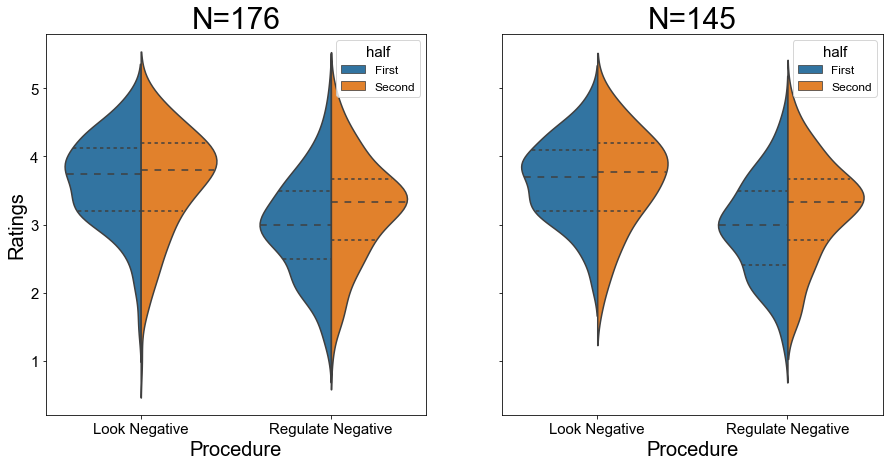

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(15,7), sharey=True)

sns.violinplot(x="Procedure", y="Rating_RESP", hue="half", 
               data=ratings_data_full_group, split=True,  inner="quart", ax=axs[0])

sns.violinplot(x="Procedure", y="Rating_RESP", hue="half", 
               data=ratings_data_preds_group, split=True,  inner="quart", ax=axs[1])

axs[0].set_ylabel("Ratings", size=20)
axs[1].set_ylabel("")
axs[0].set_xlabel("Procedure", size=20)
axs[1].set_xlabel("Procedure", size=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)
axs[0].set_title("N=176", size=30)
axs[1].set_title("N=145", size=30)
pass

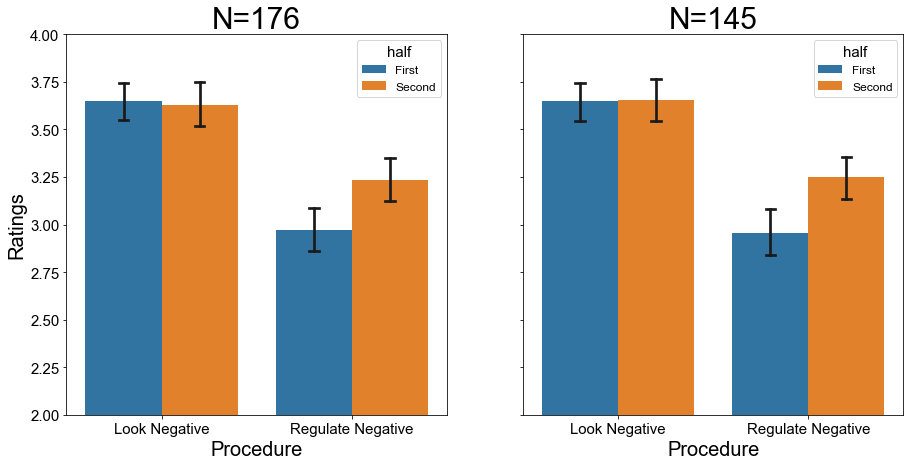

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(15,7), sharey=True)

sns.barplot(x="Procedure", y="Rating_RESP", hue="half", 
               data=ratings_data_full_group, capsize=.05, ax=axs[0], errcolor="0.1")

sns.barplot(x="Procedure", y="Rating_RESP", hue="half", 
               data=ratings_data_preds_group,  capsize=.05, ax=axs[1],  errcolor="0.1")
axs[0].set_ylabel("Ratings", size=20)
axs[1].set_ylabel("")
axs[0].set_xlabel("Procedure", size=20)
axs[1].set_xlabel("Procedure", size=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)
axs[0].set_title("N=176", size=30)
axs[1].set_title("N=145", size=30)

plt.ylim([2, 4])
pass

In [12]:
import dabest

In [13]:
dabest.load?

In [459]:
ratings_data_full_group[ratings_data_full_group.isna().any(axis=1)]

,ID,half,Procedure,Trial,Rating_RESP,Rating_RT
326,6444,Second,RegulateProc,33.888889,NaN,NaN
327,6444,Second,WatchProc,33.000000,NaN,NaN


In [30]:
ratings_data_full_group[ratings_data_full_group.ID==6444]

,ID,half,Procedure,Trial,Rating_RESP,Rating_RT
324,6444,First,Look Negative,11.600000,2.5,1675.000000
325,6444,First,Regulate Negative,12.333333,3.0,1135.666667
326,6444,Second,Look Negative,33.000000,NaN,NaN
327,6444,Second,Regulate Negative,33.888889,NaN,NaN


In [40]:
# We have to discard 6444 because they have NaN for the second half and dabest does not handle nans
full_data_for_dabest = ratings_data_full_group[ratings_data_full_group.ID!=6444]

list_dfs = []
for proc in ["Look Negative", "Regulate Negative"]:
    if proc == "Look Negative":
        name="LookNeg"
    else:
        name="RegNeg"
    temp = full_data_for_dabest[full_data_for_dabest.Procedure==proc]
    df = pd.DataFrame({})
    for half in ["First", "Second"]:
        if half == "First":
            df[name+"_1"] = temp[temp.half==half].Rating_RESP.to_list()
        else:
            df[name+"_2"] = temp[temp.half==half].Rating_RESP.to_list()
    
    signs = np.sign(df[name+"_1"].to_numpy()-df[name+"_2"].to_numpy())
    df['sign'] = ["1==2" if s==0.0 else "1>2" if s==1.0 else "2>1" for s in signs]
    
    df['ID']=temp['ID'].drop_duplicates().to_list()
    list_dfs.append(df)

df = pd.DataFrame({})
for half in ["First", "Second"]:
    if half == "First":
        name="(RegNeg-LookNeg)_1"
    else:
        name="(RegNeg-LookNeg)_2"
    temp = full_data_for_dabest[full_data_for_dabest.half==half]
    diff=temp[temp.Procedure=="Regulate Negative"].Rating_RESP.to_numpy()-temp[temp.Procedure=="Look Negative"].Rating_RESP.to_numpy()
    df[name]=diff
signs = signs = np.sign(df["(RegNeg-LookNeg)_1"].to_numpy()-df["(RegNeg-LookNeg)_2"].to_numpy())
df['sign'] = ["1==2" if s==0.0 else "1>2" if s==1.0 else "2>1" for s in signs]

df['ID']=temp['ID'].drop_duplicates().to_list()
list_dfs.append(df)
#list_dfs = pd.concat(list_dfs, axis=1)
#list_dfs['ID'] = np.arange(175)

Text(0, 0.5, "Paired \n Cohen's d")

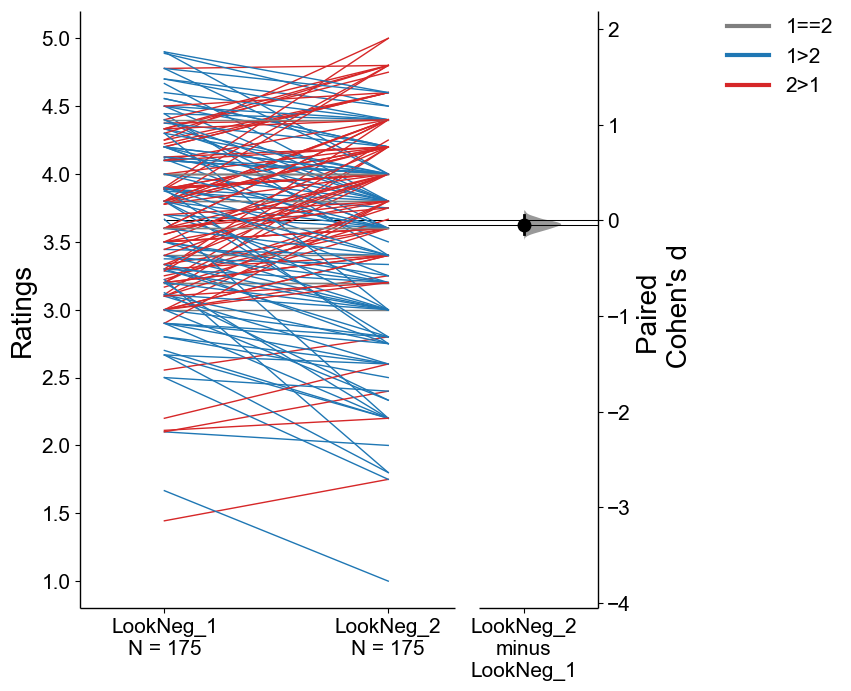

In [451]:
fig = dabest.load(list_dfs[0], 
            idx=("LookNeg_1", "LookNeg_2"), 
            paired=True, id_col="ID", resamples=1000).cohens_d.plot(
    color_col="sign",custom_palette=[sns.color_palette("tab10")[3], 
                                     sns.color_palette("tab10")[0], 
                                     sns.color_palette("tab10")[7]], 
    slopegraph_kwargs={"lw":1.0, "alpha":1}, legend_kwargs={'prop':{"size":15}}, 
    swarm_desat=1.0, swarm_label="Ratings",
    float_contrast=True, fig_size=(9,7))
fig.get_axes()[0].tick_params(labelsize=15)
fig.get_axes()[0].set_ylabel("Ratings", size=20)
fig.get_axes()[1].tick_params(labelsize=15)
fig.get_axes()[1].set_ylabel("Paired \n Cohen's d", size=20)
#fig.savefig("../plots/split_half_reliabilities/slopegraph_fullsample_lookneg.png")
#fig.savefig("../plots/split_half_reliabilities/slopegraph_fullsample_lookneg.svg")

Text(0, 0.5, "Paired \n Cohen's d")

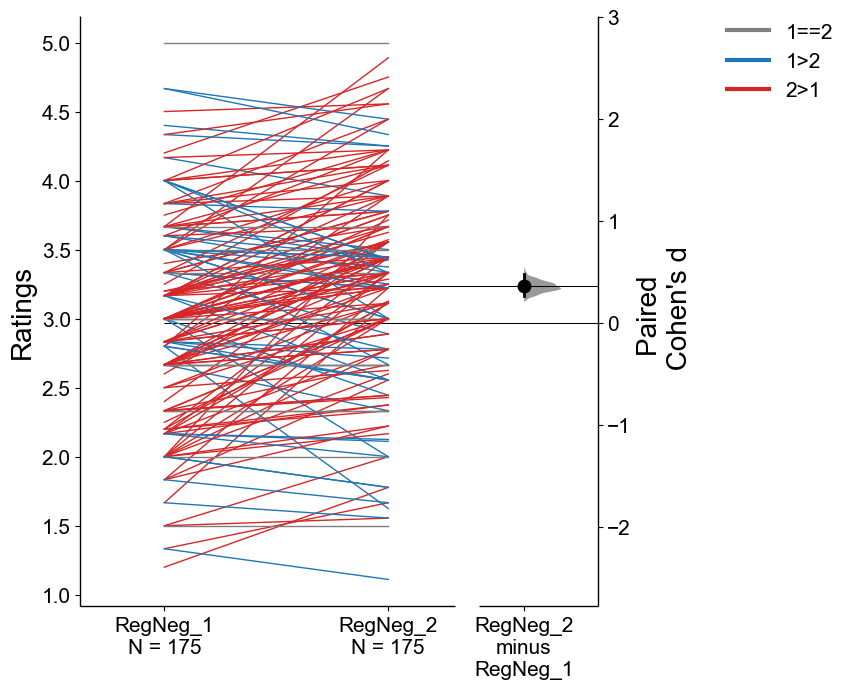

In [452]:
fig = dabest.load(list_dfs[1], 
            idx=("RegNeg_1", "RegNeg_2"), 
            paired=True, id_col="ID", resamples=1000).cohens_d.plot(
    color_col="sign",custom_palette=[sns.color_palette("tab10")[3], 
                                     sns.color_palette("tab10")[0], 
                                     sns.color_palette("tab10")[7]], 
    slopegraph_kwargs={"lw":1.0, "alpha":1}, legend_kwargs={'prop':{"size":15}}, 
    swarm_desat=1.0, swarm_label="Ratings",
    float_contrast=True, fig_size=(9,7))
fig.get_axes()[0].tick_params(labelsize=15)
fig.get_axes()[0].set_ylabel("Ratings", size=20)
fig.get_axes()[1].tick_params(labelsize=15)
fig.get_axes()[1].set_ylabel("Paired \n Cohen's d", size=20)
#fig.savefig("../plots/split_half_reliabilities/slopegraph_fullsample_lookneg.png")
#fig.savefig("../plots/split_half_reliabilities/slopegraph_fullsample_lookneg.svg")

In [41]:
dabest.load(list_dfs[1], idx=("RegNeg_1", "RegNeg_2"), 
            paired=True, id_col="ID", resamples=1000).cohens_d.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,RegNeg_1,RegNeg_2,175,175,Cohen's d,True,0.354747,95,0.258764,0.477796,0.0,1.168608e-10,2703.5,3.683800e-11,-7.06629


In [54]:
pd.melt(ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"], 
        id_vars="half", value_vars="Rating_RESP")

,half,variable,value
0,First,Rating_RESP,2.200000
1,Second,Rating_RESP,2.375000
2,First,Rating_RESP,2.833333
3,Second,Rating_RESP,2.714286
4,First,Rating_RESP,3.000000
...,...,...,...
347,Second,Rating_RESP,3.444444
348,First,Rating_RESP,4.000000
349,Second,Rating_RESP,3.428571
350,First,Rating_RESP,3.166667


In [10]:
# statistical differences between RegulateNegative ratings

import statsmodels.formula.api as smf
smf_fit = smf.mixedlm(formula="Rating_RESP~C(half)", groups="ID", 
            data=ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"], 
            missing="drop").fit()

print(f"Full Sample: t={smf_fit.tvalues[1]}, p={smf_fit.pvalues[1]}")

smf_fit = smf.mixedlm(formula="Rating_RESP~C(half)", groups="ID", 
            data=ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"], 
            missing="drop").fit()

print(f"Prediction Sample: t={smf_fit.tvalues[1]}, p={smf_fit.pvalues[1]}")

Full Sample: t=7.069770070764379, p=1.5519062101482201e-12
Prediction Sample: t=7.48949290714425, p=6.914022037786904e-14


In [11]:
from scipy.stats import ttest_rel

a = ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"][ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"].half=="First"].Rating_RESP.to_numpy()
b = ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"][ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"].half=="Second"].Rating_RESP.to_numpy()
print(ttest_rel(a[b==b],b[b==b]))

a = ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"][ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"].half=="First"].Rating_RESP.to_numpy()
b = ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"][ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"].half=="Second"].Rating_RESP.to_numpy()
print(ttest_rel(a[b==b],b[b==b]))

Ttest_relResult(statistic=-7.066290138937705, pvalue=3.683800028503813e-11)
Ttest_relResult(statistic=-7.485559704215794, pvalue=6.67886187809191e-12)


In [12]:
# statistical differences between LookNegative ratings
import statsmodels.formula.api as smf
smf_fit = smf.mixedlm(formula="Rating_RESP~C(half)", groups="ID", 
            data=ratings_data_full_group[ratings_data_full_group.Procedure=="WatchProc"], 
            missing="drop").fit()

print(f"Full Sample: t={smf_fit.tvalues[1]}, p={smf_fit.pvalues[1]}")

smf_fit = smf.mixedlm(formula="Rating_RESP~C(half)", groups="ID", 
            data=ratings_data_preds_group[ratings_data_preds_group.Procedure=="WatchProc"], 
            missing="drop").fit()

print(f"Prediction Sample: t={smf_fit.tvalues[1]}, p={smf_fit.pvalues[1]}")

Full Sample: t=-0.7489563847927099, p=0.4538834938950963
Prediction Sample: t=-0.009685955843607114, p=0.992271846215611


In [149]:
a = ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"][ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"].half=="First"].Rating_RESP.to_numpy()
b = ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"][ratings_data_full_group[ratings_data_full_group.Procedure=="RegulateProc"].half=="Second"].Rating_RESP.to_numpy()

r = np.corrcoef(a[b==b],b[b==b])[0,1]
2*r/(1+r)

0.8761950762387626

In [153]:
a = ratings_data_full_group[ratings_data_full_group.Procedure=="WatchProc"][ratings_data_full_group[ratings_data_full_group.Procedure=="WatchProc"].half=="First"].Rating_RESP.to_numpy()
b = ratings_data_full_group[ratings_data_full_group.Procedure=="WatchProc"][ratings_data_full_group[ratings_data_full_group.Procedure=="WatchProc"].half=="Second"].Rating_RESP.to_numpy()

r = np.corrcoef(a[b==b],b[b==b])[0,1]
2*r/(1+r)

0.8599625278386247

In [147]:
a = ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"][ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"].half=="First"].Rating_RESP.to_numpy()
b = ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"][ratings_data_preds_group[ratings_data_preds_group.Procedure=="RegulateProc"].half=="Second"].Rating_RESP.to_numpy()

r = np.corrcoef(a[b==b],b[b==b])[0,1]
2*r/(1+r)

0.8788662838843367

In [148]:
r

0.7839085304911724

In [131]:
np.mean(b[b==b])

3.2337573696145125

In [31]:
a.shape

(176,)

In [146]:
from nipype.algorithms import icc

icc.ICC_rep_anova(np.column_stack((a[b==b], b[b==b])))

(0.7794725149934149,
 0.42531295101693267,
 0.12032906051765728,
 0.28532832187227897,
 1,
 174)

In [143]:
from scipy.stats import ttest_1samp
ttest_1samp(b[b==b]-a[b==b], popmean=0)

Ttest_1sampResult(statistic=7.066290138937705, pvalue=3.683800028503813e-11)

In [51]:
ratings_data_full_group[ratings_data_full_group.Procedure=="Look Negative"].

,ID,half,Procedure,Trial,Rating_RESP,Rating_RT,diffs
0,4264,First,Look Negative,11.6,3.111111,1333.888889,NaN
2,4264,Second,Look Negative,33.0,4.200000,580.000000,2.000000
4,4265,First,Look Negative,11.6,3.250000,1219.250000,0.875000
6,4265,Second,Look Negative,33.0,3.600000,1065.000000,0.766667
8,4266,First,Look Negative,11.6,4.777778,1686.444444,2.063492
...,...,...,...,...,...,...,...
694,7609,Second,Look Negative,33.0,4.000000,594.400000,0.833333
696,7613,First,Look Negative,11.6,3.875000,1871.875000,0.430556
698,7613,Second,Look Negative,33.0,3.250000,1492.250000,-0.750000
700,7614,First,Look Negative,11.6,4.200000,959.400000,0.771429


In [57]:
ratings_data_full_group.Rating_RESP.diff().abs()

0           NaN
1      0.911111
2      2.000000
3      1.825000
4      0.875000
         ...   
699    0.178571
700    0.771429
701    1.033333
702    0.833333
703    0.333333
Name: Rating_RESP, Length: 704, dtype: float64

In [74]:
ratings_data_full_group['diffs'] = ratings_data_full_group.Rating_RESP.diff()
ratings_data_preds_group['diffs'] = ratings_data_preds_group.Rating_RESP.diff()

In [88]:
cond_look = (ratings_data_full_group.half=="First") & (ratings_data_full_group.Procedure=="Look Negative")
cond_reg = (ratings_data_full_group.half=="First") & (ratings_data_full_group.Procedure=="Regulate Negative")
diff_1 = ratings_data_full_group.loc[cond_look, "Rating_RESP"].to_numpy() - ratings_data_full_group.loc[cond_reg, "Rating_RESP"].to_numpy()

cond_look = (ratings_data_full_group.half=="Second") & (ratings_data_full_group.Procedure=="Look Negative")
cond_reg = (ratings_data_full_group.half=="Second") & (ratings_data_full_group.Procedure=="Regulate Negative")
diff_2 =ratings_data_full_group.loc[cond_look, "Rating_RESP"].to_numpy() - ratings_data_full_group.loc[cond_reg, "Rating_RESP"].to_numpy()

diffs = np.concatenate((diff_1, diff_2))

x_full = ["Look Negative-Regulate Negative"]*len(diffs)
y_full = diffs
hue_full=["First"]*len(diff_1) + ["Second"]*len(diff_2)


cond_look = (ratings_data_preds_group.half=="First") & (ratings_data_preds_group.Procedure=="Look Negative")
cond_reg = (ratings_data_preds_group.half=="First") & (ratings_data_preds_group.Procedure=="Regulate Negative")
diff_1 = ratings_data_preds_group.loc[cond_look, "Rating_RESP"].to_numpy() - ratings_data_preds_group.loc[cond_reg, "Rating_RESP"].to_numpy()

cond_look = (ratings_data_preds_group.half=="Second") & (ratings_data_preds_group.Procedure=="Look Negative")
cond_reg = (ratings_data_preds_group.half=="Second") & (ratings_data_preds_group.Procedure=="Regulate Negative")
diff_2 =ratings_data_preds_group.loc[cond_look, "Rating_RESP"].to_numpy() - ratings_data_preds_group.loc[cond_reg, "Rating_RESP"].to_numpy()

diffs = np.concatenate((diff_1, diff_2))

x_preds = ["Look Negative-Regulate Negative"]*len(diffs)
y_preds = diffs
hue_preds=["First"]*len(diff_1) + ["Second"]*len(diff_2)

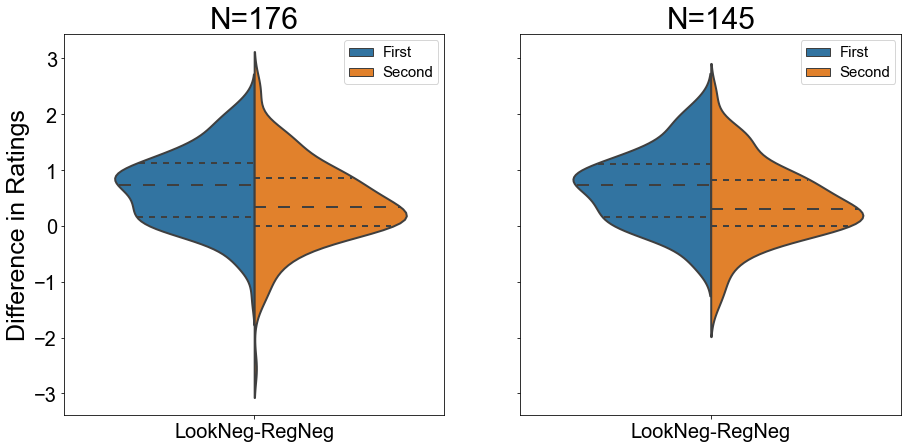

In [138]:
fig, axs = plt.subplots(ncols=2, figsize=(15,7), sharey=True)

sns.violinplot(x=x_full, y=y_full, hue=hue_full, split=True,  inner="quart", 
               ax=axs[0], linewidth=2)

sns.violinplot(x=x_preds, y=y_preds, hue=hue_preds, split=True, inner="quart", ax=axs[1], 
               linewidth=2)

axs[0].set_xticklabels(["LookNeg-RegNeg"])
axs[1].set_xticklabels(["LookNeg-RegNeg"])
axs[0].set_ylabel("Difference in Ratings", size=25)
axs[1].set_ylabel("")
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)
axs[0].set_title("N=176", size=30)
axs[1].set_title("N=145", size=30)
plt.setp(axs[0].get_legend().texts, size=15)
plt.setp(axs[1].get_legend().texts, size=15)
pass
plt.savefig("../plots/split_half_reliabilities/diff_ratings_splithalf_violinplot.svg", dpi=300)
plt.savefig("../plots/split_half_reliabilities/diff_ratings_splithalf_violinplot.png", dpi=300)
plt.savefig("../plots/split_half_reliabilities/diff_ratings_splithalf_violinplot.pdf", dpi=300)

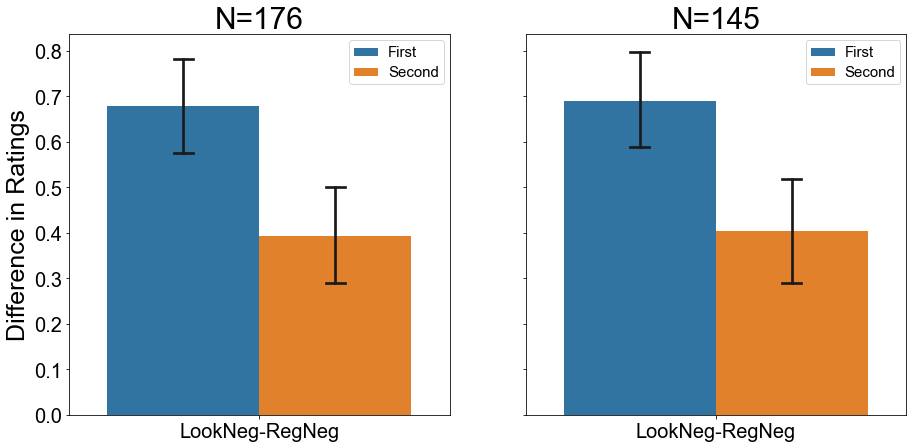

In [139]:
fig, axs = plt.subplots(ncols=2, figsize=(15,7), sharey=True)

sns.barplot(x=x_full, y=y_full, hue=hue_full, capsize=.05,   errcolor="0.1", ax=axs[0])
sns.barplot(x=x_preds, y=y_preds, hue=hue_preds, capsize=.05,  errcolor="0.1", ax=axs[1])

axs[0].set_xticklabels(["LookNeg-RegNeg"])
axs[1].set_xticklabels(["LookNeg-RegNeg"])
axs[0].set_ylabel("Difference in Ratings", size=25)
axs[1].set_ylabel("")
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)
axs[0].set_title("N=176", size=30)
axs[1].set_title("N=145", size=30)
plt.setp(axs[0].get_legend().texts, size=15)
plt.setp(axs[1].get_legend().texts, size=15)
pass
plt.savefig("../plots/split_half_reliabilities/diff_ratings_splithalf_bars.svg", dpi=300)
plt.savefig("../plots/split_half_reliabilities/diff_ratings_splithalf_bars.png", dpi=300)
plt.savefig("../plots/split_half_reliabilities/diff_ratings_splithalf_bars.pdf", dpi=300)

In [140]:
with open("../data/AllSubjects_1-20.txt") as f:
    lines = f.readlines()

In [141]:
lines[7].strip().split("\t")[:8]

['Snake', '1019', '3.95', '1.96', '5.77', '1.83', '4.23', '2.08']

In [142]:
pictures_data = []
for line in tqdm.tqdm(lines[7:]):
    line = line.strip()
    line = line.split("\t")
    pictures_data.append(line[:6])
pictures_data_df = pd.DataFrame(pictures_data, 
                                columns=["desc", 
                                         "IAPS", 
                                         "valence_mean", 
                                         "valence_sd", 
                                         "arousal_mean", 
                                         "arousal_sd"])

100%|██████████████████████████████████| 1194/1194 [00:00<00:00, 1132262.94it/s]


In [143]:
np.alltrue([np.alltrue([a==b for a, b in zip(ratings_data_full[ratings_data_full.ID==4264].IAPS.to_list(),
                                 ratings_data_full[ratings_data_full.ID==subj].IAPS.to_list())]) 
 for subj in subject_fullsample])

True

In [144]:
pip_images = ratings_data_full[ratings_data_full.ID==4264]
pip_images.IAPS = pip_images.IAPS.apply(lambda x: str(x).split(".")[0])
pip_images = pd.merge(pip_images, pictures_data_df, on="IAPS")

pip_images.valence_mean = pip_images.valence_mean.astype(float)
pip_images.valence_sd = pip_images.valence_sd.astype(float)
pip_images.arousal_mean = pip_images.arousal_mean.astype(float)
pip_images.arousal_sd = pip_images.arousal_sd.astype(float)

pip_images.Procedure = pip_images.Procedure.replace(to_replace=["WatchProc", "RegulateProc"], 
                                                    value=["Look Negative", "Regulate Negative"])

/home/javi/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [145]:
pd.melt(pip_images.loc[:, ["Procedure", "half", "valence_mean", "valence_sd", "arousal_mean", "arousal_sd"]], 
        id_vars = ["Procedure", "half"])

,Procedure,half,variable,value
0,Look Negative,First,valence_mean,1.88
1,Regulate Negative,First,valence_mean,2.57
2,Look Negative,First,valence_mean,1.56
3,Regulate Negative,First,valence_mean,2.31
4,Regulate Negative,First,valence_mean,2.02
...,...,...,...,...
115,Regulate Negative,Second,arousal_sd,2.44
116,Regulate Negative,Second,arousal_sd,2.35
117,Regulate Negative,Second,arousal_sd,2.06
118,Look Negative,Second,arousal_sd,2.33


In [146]:
pip_images.loc[:, ["Procedure", "half", "valence_mean", "valence_sd",  "arousal_mean", "arousal_sd"]]

,Procedure,half,valence_mean,valence_sd,arousal_mean,arousal_sd
0,Look Negative,First,1.88,1.67,5.72,2.23
1,Regulate Negative,First,2.57,1.39,6.60,1.87
2,Look Negative,First,1.56,1.09,6.84,2.36
3,Regulate Negative,First,2.31,1.59,5.69,2.28
4,Regulate Negative,First,2.02,1.30,5.41,2.21
5,Look Negative,First,2.06,1.48,6.49,2.26
6,Look Negative,First,2.30,1.86,5.62,2.45
7,Look Negative,First,2.54,1.60,5.92,2.13
8,Look Negative,First,2.47,1.87,5.25,2.46
9,Look Negative,First,2.21,1.34,6.99,2.19


In [147]:
pd.melt(pip_images.loc[:, ["Procedure", "half", "valence_mean", "valence_sd", 
                                            "arousal_mean", "arousal_sd"]], 
                         id_vars = ["Procedure", "half"]).value

0      1.88
1      2.57
2      1.56
3      2.31
4      2.02
       ... 
115    2.44
116    2.35
117    2.06
118    2.33
119    1.99
Name: value, Length: 120, dtype: float64

<AxesSubplot:xlabel='variable', ylabel='value'>

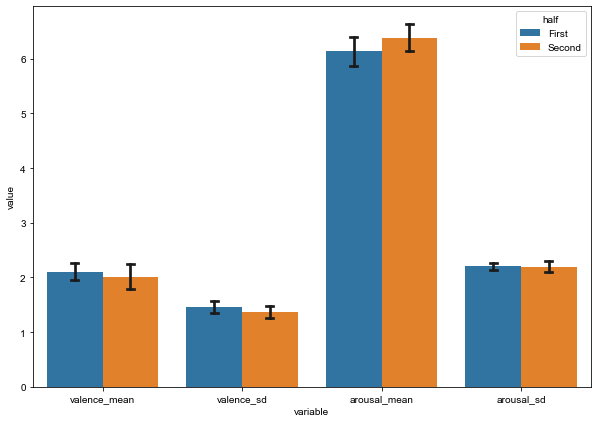

In [24]:
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(x="variable", y="value", hue="half",
            data=pd.melt(pip_images.loc[:, ["Procedure", "half", "valence_mean", "valence_sd", 
                                            "arousal_mean", "arousal_sd"]], 
                         id_vars = ["Procedure", "half"]), 
            capsize=.05, ax=ax, errcolor="0.1")

In [196]:
from statsmodels.formula import api as smf
for score in ["valmn", "valsd", "aromn", "arosd"]:
    print(smf.ols(f"{score}~C(half)",data=pip_images).fit().pvalues[1])

0.4978472010958789
0.3209013422900968
0.21690303394044183
0.8841125917999813


In [85]:
g.legend.texts

[Text(0, 0, 'First'), Text(0, 0, 'Second')]

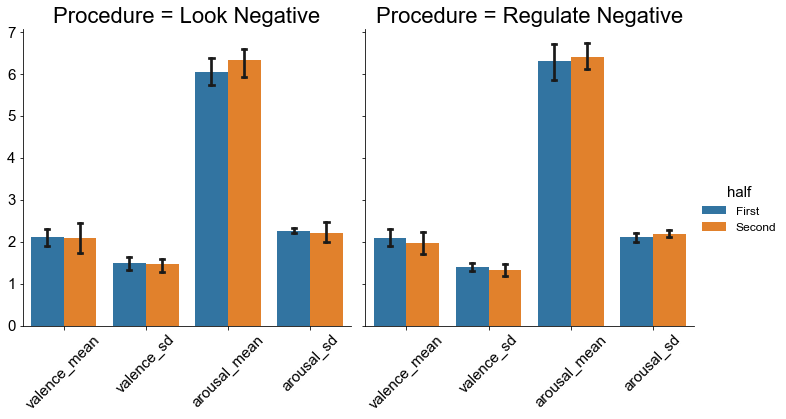

In [158]:

g= sns.catplot(x="variable", y="value", hue="half", col="Procedure", 
            kind="bar",
            data=pd.melt(pip_images.loc[:, ["Procedure", "half", "valence_mean", "valence_sd", 
                                            "arousal_mean", "arousal_sd"]], 
                         id_vars = ["Procedure", "half"]), 
            capsize=.05, errcolor="0.1")
g.set_xlabels("")
g.set_ylabels("", size=20)
g.set_xticklabels(size=15, rotation=45)
g.set_titles(size=22)
plt.setp(g.legend.get_title(), fontsize=15)
plt.setp(g.legend.texts, fontsize=12)
plt.setp(g.axes[0][0].get_yticklabels(), fontsize=15)
pass
plt.savefig("../plots/split_half_reliabilities/rebuttal_letter_val_aro_split_half.pdf", dpi=300)
plt.savefig("../plots/split_half_reliabilities/rebuttal_letter_val_aro_split_half.svg", dpi=300)
plt.savefig("../plots/split_half_reliabilities/rebuttal_letter_val_aro_split_half.png", dpi=300)

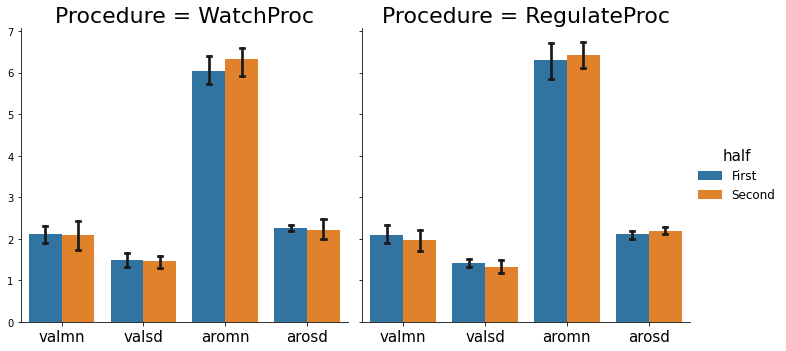

In [242]:
g= sns.catplot(x="variable", y="value", hue="half", col="Procedure", 
            kind="bar",
            data=pd.melt(pip_images.loc[:, ["Procedure", "half", "valmn", "valsd", "aromn", "arosd"]], 
                         id_vars = ["Procedure", "half"]), 
            capsize=.05, errcolor="0.1")
g.set_xlabels("")
g.set_ylabels("", size=20)
g.set_xticklabels(size=15)
g.set_titles(size=22)
#plt.savefig("../plots/split_half_reliabilities/valence_arousal_split_half.pdf", dpi=300)

In [150]:
from statsmodels.formula import api as smf

for score in ["valence_mean", "valence_sd", "arousal_mean", "arousal_sd"]:
    print(smf.ols(f"{score}~C(half)",data=pip_images[pip_images.Procedure=="Look Negative"]).fit().pvalues[1])

0.9191991603549629
0.8753326297121734
0.3349460329377857
0.685194311139708


In [153]:
from scipy.stats import mannwhitneyu

temp = pip_images[pip_images.Procedure=="Look Negative"]

for score in ["valence_mean", "valence_sd", "arousal_mean", "arousal_sd"]:
    print(mannwhitneyu(temp.loc[temp.half=="First", score].to_numpy(),
                       temp.loc[temp.half=="Second", score].to_numpy()
                      )
         )

MannwhitneyuResult(statistic=25.0, pvalue=0.4755851346484678)
MannwhitneyuResult(statistic=22.5, pvalue=0.40316318715153393)
MannwhitneyuResult(statistic=18.0, pvalue=0.2129915582724594)
MannwhitneyuResult(statistic=20.0, pvalue=0.2906016458576085)


In [155]:
from statsmodels.formula import api as smf

for score in ["valence_mean", "valence_sd", "arousal_mean", "arousal_sd"]:
    print(smf.ols(f"{score}~C(half)",data=pip_images[pip_images.Procedure=="Regulate Negative"]).fit().pvalues[1])

0.5359071951691914
0.4266072956061747
0.7219712647099632
0.3231500390827491


In [156]:
from scipy.stats import mannwhitneyu

temp = pip_images[pip_images.Procedure=="Regulate Negative"]

for score in ["valence_mean", "valence_sd", "arousal_mean", "arousal_sd"]:
    print(mannwhitneyu(temp.loc[temp.half=="First", score].to_numpy(),
                       temp.loc[temp.half=="Second", score].to_numpy()
                      )
         )

MannwhitneyuResult(statistic=23.0, pvalue=0.3399942011171472)
MannwhitneyuResult(statistic=18.5, pvalue=0.17267376417034536)
MannwhitneyuResult(statistic=26.0, pvalue=0.4765056977113645)
MannwhitneyuResult(statistic=20.5, pvalue=0.23935686959954922)
